In [1]:
from pythtb import W90
import matplotlib.pyplot as plt
import numpy as np

In [2]:
silicon = W90("silicon_w90", "si")

In [3]:
# hard coded fermi level in eV
fermi_ev = 6.2285135

In [4]:
# all pair distances between the orbitals
print("Shells:\n", silicon.shells())

Shells:
 [ 0.    1.3   1.96  2.35  2.51  2.97  3.18  3.36  3.66  3.82  3.93  4.03
  4.29  4.48  4.57  4.61  4.83  4.97  5.12  5.29  5.32  5.4   5.42  5.48
  5.52  5.55  5.74  5.89  5.95  6.13  6.16  6.27  6.33  6.36  6.39  6.52
  6.55  6.61  6.63  6.74  6.89  7.07  7.1   7.22  7.25  7.39  7.44  7.56
  7.58  7.63  7.69  7.72  7.74  7.77  7.88  7.9   7.99  8.04  8.17  8.19
  8.27  8.31  8.32  8.34  8.36  8.47  8.49  8.53  8.55  8.59  8.74  8.78
  8.81  8.85  8.92  8.94  9.02  9.11  9.15  9.19  9.31  9.35  9.36  9.44
  9.46  9.53  9.55  9.57  9.64  9.72  9.79  9.81  9.88  9.92 10.04 10.29
 10.3  10.4  10.44 10.52 10.54 10.62 10.76 10.8  10.84 10.87 10.99 11.08
 11.18 11.21 11.26 11.29 11.38 11.46 11.72 11.75 12.23 12.24 12.43 13.08
 13.2  13.28 13.45]


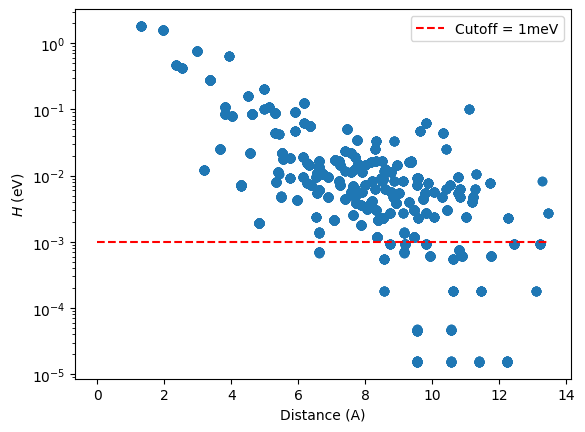

In [5]:
# plot hopping terms as a function of distance on a log scale
(dist, ham) = silicon.dist_hop()
fig, ax = plt.subplots()
ax.scatter(dist, np.abs(ham))
ax.hlines(
    1e-3, xmin=0, xmax=max(dist), colors="r", linestyles="dashed", label="Cutoff = 1meV"
)
ax.legend()
ax.set_xlabel("Distance (A)")
ax.set_ylabel(r"$H$ (eV)")
ax.set_yscale("log")

In [6]:
# get tb model in which some small terms are ignored
my_model = silicon.model(
    zero_energy=fermi_ev,
    min_hopping_norm=1e-3,
)

In [7]:
(w90_kpt, w90_evals, w90_k_dist, w90_k_nodes, w90_k_labels) = silicon.bands_w90(
    return_k_dist=True, return_k_nodes=True
)

print("k-point labels:", w90_k_labels)
print("k-point nodes (fractional):\n", w90_k_nodes)

k-point labels: ['$L$', '$\\Gamma$', '$X$', '$X$', '$K$', '$\\Gamma$']
k-point nodes (fractional):
 [[ 0.5    0.5    0.5  ]
 [ 0.     0.     0.   ]
 [ 0.5    0.     0.5  ]
 [ 0.5   -0.5    0.   ]
 [ 0.375 -0.375  0.   ]
 [ 0.     0.     0.   ]]


In [8]:
k_vec, k_dist, k_node_dist = my_model.k_path(w90_k_nodes, nk=500, report=False)

In [9]:
int_evals = my_model.solve_ham(w90_kpt)

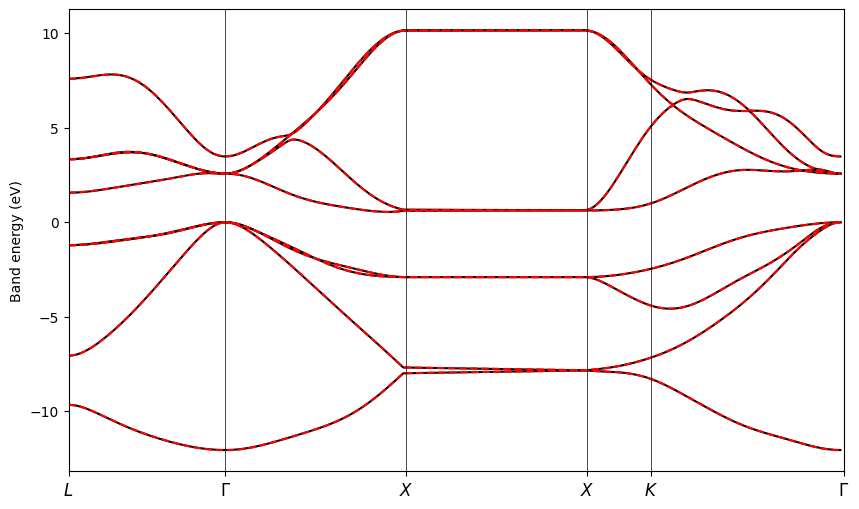

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(w90_k_dist, w90_evals[:, 0] - fermi_ev, "k-", zorder=0, label="Wannier90")
ax.plot(w90_k_dist, w90_evals[:, 1:] - fermi_ev, "k-", zorder=0)
ax.plot(w90_k_dist, int_evals[:, 0], "r--", zorder=1, label="TBModel")
ax.plot(w90_k_dist, int_evals[:, 1:], "r--", zorder=1)

# set x-ticks at k-point nodes
ax.set_xticks(k_node_dist)
for n in range(len(w90_k_nodes)):
    ax.axvline(x=k_node_dist[n], linewidth=0.5, color="k", zorder=1)
ax.set_xticklabels(w90_k_labels, size=12)
ax.set_xlim(k_node_dist[0], k_node_dist[-1])
ax.set_ylabel("Band energy (eV)")
plt.show()